In [1]:
import sys
sys.path.append("../")
import numpy as np
import phate
import graphtools as gt
import numpy as np
import pygsp
from src.mds import embed_MDS
import scprep
from scipy.spatial.distance import jensenshannon
from src.embedding import EmbJSD, EmbHeatGeo, EmbHeatPHATE, EmbCTD, EmbGraphMMD, EmbMarHeatGeo
import scanpy as sc
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap

In [2]:
path = "/network/scratch/a/alexander.tong/trajectory-inference/data/wot_v1.h5ad"

In [3]:
adata = sc.read_h5ad(path)

In [4]:
sc.pp.subsample(adata, n_obs=10000)

In [5]:
labels = adata.obs.day
data = adata.X

knn=5
anisotropy=0
decay=40
tau_min=0.05
tau_max=10
n_landmark=3000

In [12]:
sc.pp.neighbors(adata, n_neighbors=knn, use_rep='X')
sc.tl.umap(adata, min_dist=0.8, spread=1, n_components=2, random_state=0)

<AxesSubplot:>

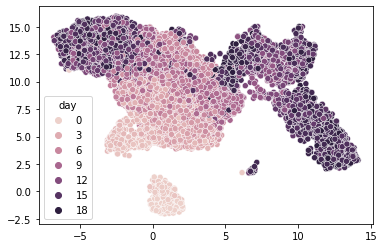

In [13]:
emb_umap = adata.obsm['X_umap']
sns.scatterplot(x=emb_umap[:,0], y=emb_umap[:,1], hue=labels)

In [14]:
emb_op = EmbHeatGeo(knn=knn, anisotropy=anisotropy, decay=decay, n_landmark=n_landmark)
emb_multi = emb_op.fit_transform(data.toarray(),tau_min=tau_min, tau_max=tau_max, n_tau=10)
emb_op = phate.PHATE(knn=knn, anisotropy=anisotropy, decay=decay)
emb_phate = emb_op.fit_transform(data.toarray())
#emb_pca = adata.obsm["X_pca"][:,0],adata.obsm["X_pca"][:,1]
emb_op = TSNE()
emb_tsne = emb_op.fit_transform(data.toarray())

Calculating PHATE...
  Running PHATE on 10000 observations and 19089 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 15.65 seconds.
    Calculating KNN search...
    Calculated KNN search in 30.93 seconds.
    Calculating affinities...
    Calculated affinities in 0.40 seconds.
  Calculated graph and diffusion operator in 47.02 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.82 seconds.
    Calculating KMeans...
    Calculated KMeans in 14.69 seconds.
  Calculated landmark operator in 18.45 seconds.
  Calculating optimal t...
    Automatically selected t = 28
  Calculated optimal t in 3.60 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.16 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.03 seconds.
Calculated PHATE in 75.29 seconds.


/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other argume

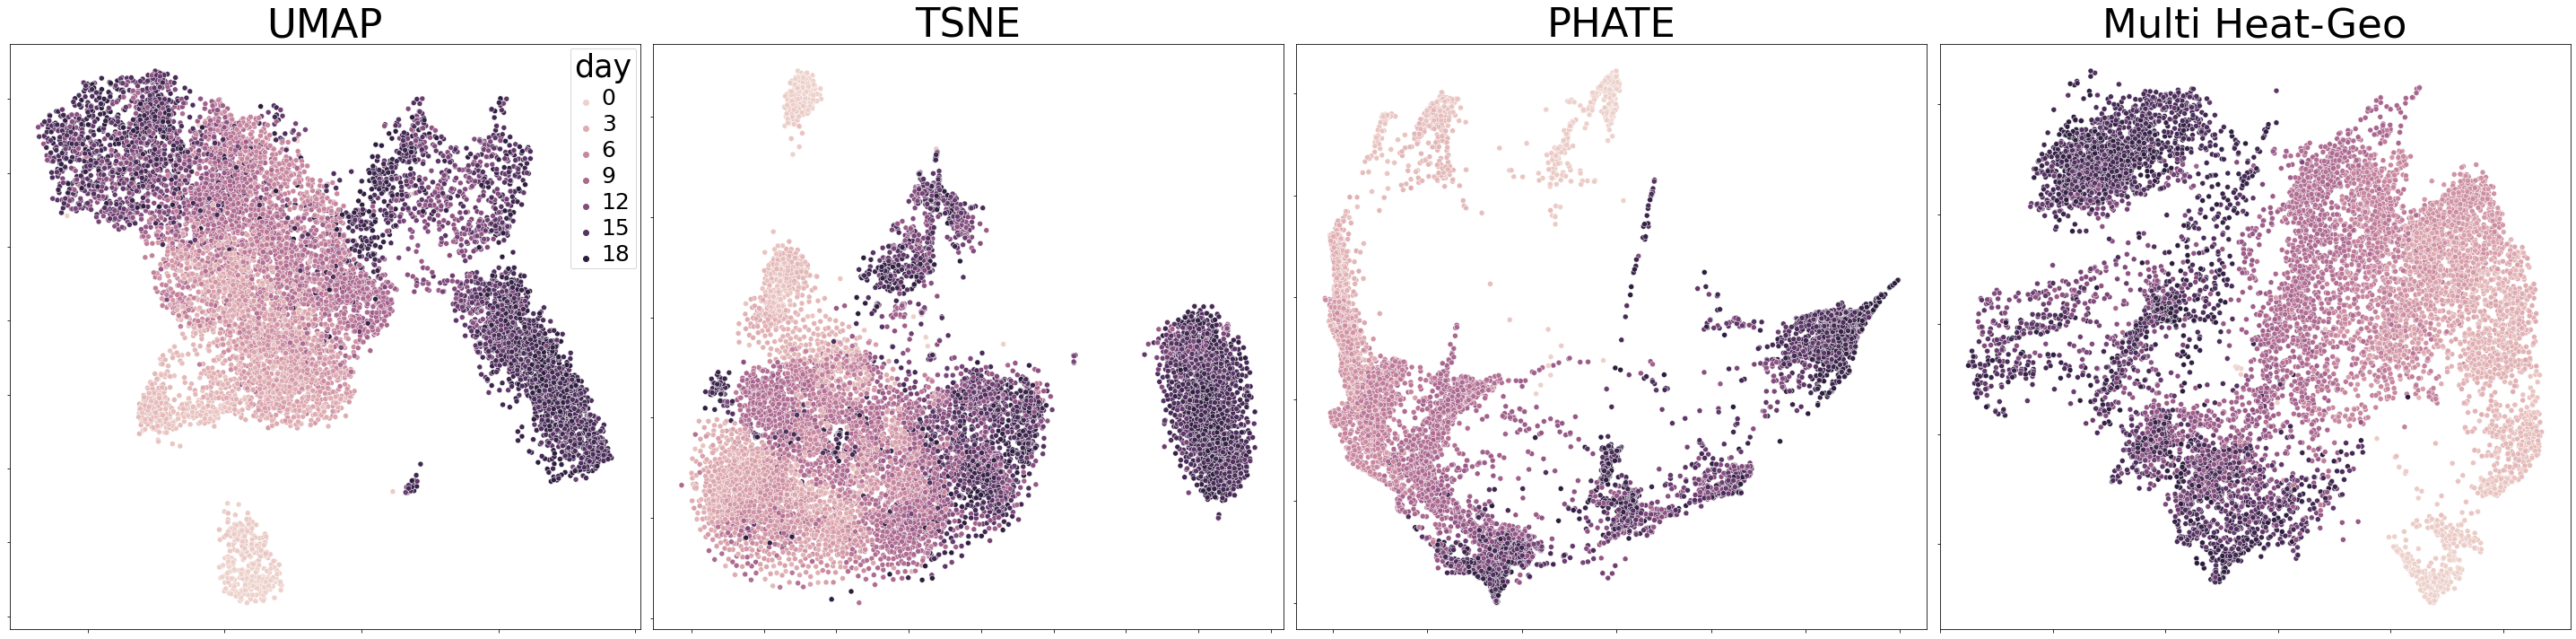

In [29]:
fig, axes = plt.subplots(1,4,figsize=(40,10))
sns.scatterplot(emb_umap[:,0],emb_umap[:,1], c=labels, hue=labels, legend=True, ax=axes[0]).set(title="UMAP", xticklabels=[],yticklabels=[])
sns.scatterplot(emb_tsne[:,0],emb_tsne[:,1], c=labels, hue=labels, legend=False, ax=axes[1]).set(title="TSNE",xticklabels=[],yticklabels=[])
sns.scatterplot(emb_phate[:,0],emb_phate[:,1], c=labels, hue=labels, legend=False, ax=axes[2]).set(title="PHATE",xticklabels=[],yticklabels=[])
sns.scatterplot(emb_multi[:,0],emb_multi[:,1], c=labels, hue=labels, legend=False, ax=axes[3]).set(title="Multi Heat-Geo",xticklabels=[],yticklabels=[])
plt.setp(axes[0].get_legend().get_texts(), fontsize='25') 
plt.setp(axes[0].get_legend().get_title(), fontsize='35') 
for ax in axes:
    ax.title.set_size(45)
fig.tight_layout()
fig.savefig("wot_v1.png", dpi=300)

/home/mila/g/guillaume.huguet/.conda/envs/ManifoldOT/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mila/g/guillaume.huguet/.conda/envs/ManifoldOT/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Multi Heat-geo Comb')]

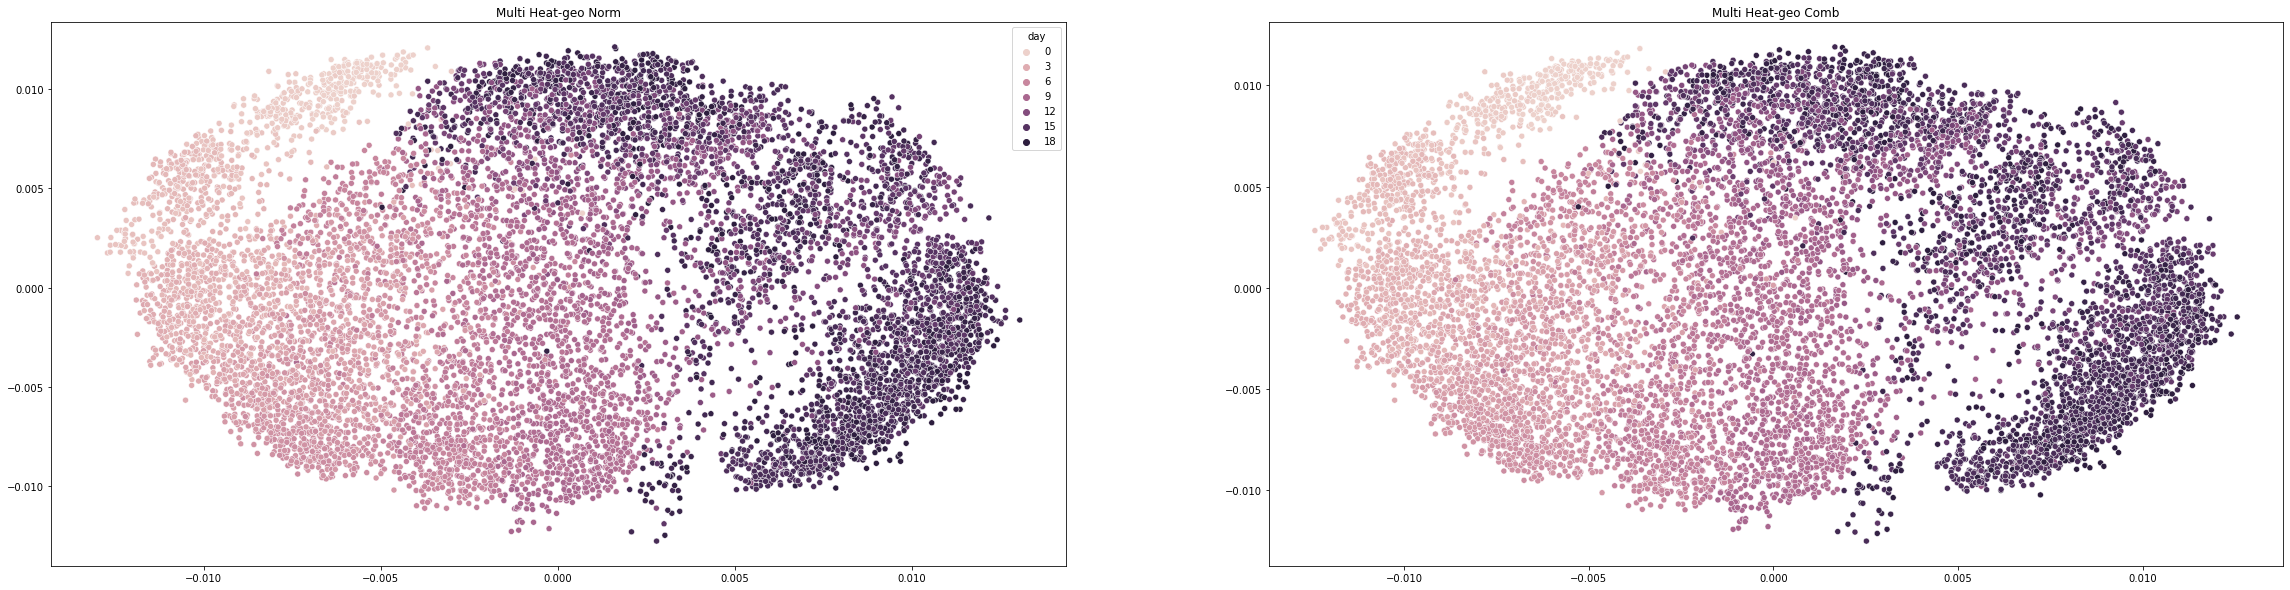

In [6]:
emb_op = EmbMarHeatGeo(knn=knn, anisotropy=anisotropy, decay=decay)
emb_norm = emb_op.fit_transform(data.toarray(),tau_min=tau_min, tau_max=tau_max, n_tau=10, lap="norm")
emb_op = EmbMarHeatGeo(knn=knn, anisotropy=anisotropy, decay=decay)
emb_comb = emb_op.fit_transform(data.toarray(),tau_min=tau_min, tau_max=tau_max, n_tau=10, lap="comb")
fig, axes = plt.subplots(1,2,figsize=(40,10))
sns.scatterplot(emb_norm[:,0],emb_norm[:,1], c=labels, hue=labels, legend=True, ax=axes[0]).set(title="Multi Heat-geo Norm")
sns.scatterplot(emb_comb[:,0],emb_comb[:,1], c=labels, hue=labels, legend=False, ax=axes[1]).set(title="Multi Heat-geo Comb")